In [ ]:
import sys
import os

In [47]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)

f:\Vital Stuff\Εργασίες Σχολείου\The dreadful present\Μαστερ\Μαστερ Εξάμηνο 2ο\Machine Learning in Computational Biology\Project\FinalProject\MLKinCompBioFinalProject


In [48]:
%load_ext autoreload
%autoreload 2

from sex import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook follows the classification one pretty closely, so remarks will only be made for specific cells.

We load up our sexed up datasets. Once again, like in the region-specific classification, v2 is for testing and v3 is for training

In [49]:
X_df = sex_specific_region(
    region_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_SEX_subset_3k_cells.h5ad",
    verbose=False
)

my_file = Path("../data/train_SEX_HY_subset3k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/train_SEX_HY_subset3k.csv", index=False)

del X_df
gc.collect()

X_df = sex_specific_region(
    region_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_SEX_subset_10k_cells.h5ad",
    verbose=False
)

my_file = Path("../data/train_SEX_HY_subset10k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/train_SEX_HY_subset10k.csv", index=False)


test_df = sex_specific_region(
    region_path="../data/abc_atlas/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HY-log2_SEX_subset_3k_cells.h5ad",
    verbose=False,
    test=True
)

my_file = Path("../data/test_SEX_HY_subset3k_v2.csv")

if not my_file.is_file():
    test_df.to_csv("../data/test_SEX_HY_subset3k_v2.csv", index=False)

Index(['ENSMUSG00000025900', 'ENSMUSG00000025902', 'ENSMUSG00000104238',
       'ENSMUSG00000079671', 'ENSMUSG00000067879', 'ENSMUSG00000097893',
       'ENSMUSG00000042501', 'ENSMUSG00000048960', 'ENSMUSG00000067780',
       'ENSMUSG00000028033',
       ...
       'ENSMUSG00000086860', 'ENSMUSG00000084806', 'ENSMUSG00000044583',
       'ENSMUSG00000086258', 'ENSMUSG00000087587', 'ENSMUSG00000035299',
       'ENSMUSG00000072844', 'ENSMUSG00000087263', 'ENSMUSG00000102045',
       'ENSMUSG00000090805'],
      dtype='object', name='gene_identifier', length=2000)
Index(['ENSMUSG00000102343', 'ENSMUSG00000025900', 'ENSMUSG00000025902',
       'ENSMUSG00000104238', 'ENSMUSG00000067879', 'ENSMUSG00000097893',
       'ENSMUSG00000042501', 'ENSMUSG00000048960', 'ENSMUSG00000042596',
       'ENSMUSG00000025927',
       ...
       'ENSMUSG00000031373', 'ENSMUSG00000015405', 'ENSMUSG00000031377',
       'ENSMUSG00000087677', 'ENSMUSG00000044583', 'ENSMUSG00000031355',
       'ENSMUSG00000035299',

In [50]:
common_columns = X_df.columns.intersection(test_df.columns)

X_df=X_df[common_columns].copy()
print(X_df.shape)
test_df=test_df[common_columns].copy()
print(test_df.shape)

(10000, 638)
(3000, 638)


In [53]:
my_file = Path("../data/rncv_SEX_summary_results_HY.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/train_SEX_HY_subset3k.csv',res_dest="../data/rncv_SEX_summary_results_HY.csv")

[I 2025-06-25 14:49:37,246] A new study created in memory with name: LogisticRegression


------ Repetition 1/2 ------



[I 2025-06-25 14:49:38,122] Trial 0 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0015061347598860362, 'l1_ratio': 0.2305493533555708}. Best is trial 0 with value: 0.5.
[I 2025-06-25 14:49:49,770] Trial 1 finished with value: 0.5563301722313004 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.34509139816513673, 'l1_ratio': 0.5504504748487119}. Best is trial 1 with value: 0.5563301722313004.
[I 2025-06-25 14:49:57,214] Trial 2 finished with value: 0.5910154772693216 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.016972492312570385, 'l1_ratio': 0.4449076837809237}. Best is trial 2 with value: 0.5910154772693216.
[I 2025-06-25 14:50:07,298] Trial 3 finished with value: 0.5610016578541136 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.07007266739079258, 'l1_ratio': 0.7671346163697377}. Best is trial 2 with value: 0.5910154772693216.
[I 2025-06-25 14:50:13,948] Trial 4 finished with value: 0.5558057004493094 and paramet

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5910154772693216 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.016972492312570385, 'l1_ratio': 0.4449076837809237}



[I 2025-06-25 14:50:25,459] A new study created in memory with name: LogisticRegression
[I 2025-06-25 14:50:38,052] Trial 0 finished with value: 0.5789466798914426 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.6689067780125937, 'l1_ratio': 0.1879438470571313}. Best is trial 0 with value: 0.5789466798914426.
[I 2025-06-25 14:50:49,329] Trial 1 finished with value: 0.5786850386396557 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.16554669093787752, 'l1_ratio': 0.6981730588817635}. Best is trial 0 with value: 0.5789466798914426.
[I 2025-06-25 14:50:53,499] Trial 2 finished with value: 0.5593759142577831 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.003905615128119537, 'l1_ratio': 0.8105052345336541}. Best is trial 0 with value: 0.5789466798914426.
[I 2025-06-25 14:51:05,661] Trial 3 finished with value: 0.5783175516087369 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.029105006790242867, 'l1_ratio': 0.06851272793060

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5789466798914426 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.6689067780125937, 'l1_ratio': 0.1879438470571313}



[I 2025-06-25 14:51:21,305] A new study created in memory with name: LogisticRegression
[I 2025-06-25 14:51:26,268] Trial 0 finished with value: 0.594900849858357 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0010198557131181867, 'l1_ratio': 0.04813918251441407}. Best is trial 0 with value: 0.594900849858357.
[I 2025-06-25 14:51:32,909] Trial 1 finished with value: 0.5843460039055902 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.012433658969122246, 'l1_ratio': 0.7280155851920715}. Best is trial 0 with value: 0.594900849858357.
[I 2025-06-25 14:51:42,161] Trial 2 finished with value: 0.591486431522538 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.020855928087406553, 'l1_ratio': 0.3732151979069853}. Best is trial 0 with value: 0.594900849858357.
[I 2025-06-25 14:51:53,148] Trial 3 finished with value: 0.5837692038732419 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.2017447949345994, 'l1_ratio': 0.9980313313486234}. Best is trial

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.594900849858357 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0010198557131181867, 'l1_ratio': 0.04813918251441407}



[I 2025-06-25 14:52:08,316] A new study created in memory with name: LogisticRegression
[I 2025-06-25 14:52:14,973] Trial 0 finished with value: 0.5598980074829397 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.06396959357119955, 'l1_ratio': 0.4017409893590477}. Best is trial 0 with value: 0.5598980074829397.
[I 2025-06-25 14:52:20,249] Trial 1 finished with value: 0.5795318048727115 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.00651463609859839, 'l1_ratio': 0.5549659245112276}. Best is trial 1 with value: 0.5795318048727115.
[I 2025-06-25 14:52:27,939] Trial 2 finished with value: 0.585928933478901 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.01667562062316424, 'l1_ratio': 0.26636436699803767}. Best is trial 2 with value: 0.585928933478901.
[I 2025-06-25 14:52:36,062] Trial 3 finished with value: 0.5787385561684303 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0013523424027826008, 'l1_ratio': 0.021511029647114488}. Best is t

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.585928933478901 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.01667562062316424, 'l1_ratio': 0.26636436699803767}



[I 2025-06-25 14:52:53,593] A new study created in memory with name: LDA
[I 2025-06-25 14:53:00,795] Trial 0 finished with value: 0.5101564376830002 and parameters: {'solver': 'svd', 'tol': 0.06962291041674383}. Best is trial 0 with value: 0.5101564376830002.
[I 2025-06-25 14:53:07,837] Trial 1 finished with value: 0.5159791448136758 and parameters: {'solver': 'svd', 'tol': 0.05620103565357838}. Best is trial 1 with value: 0.5159791448136758.
[I 2025-06-25 14:53:14,902] Trial 2 finished with value: 0.5014973015272713 and parameters: {'solver': 'svd', 'tol': 0.07611465174189695}. Best is trial 1 with value: 0.5159791448136758.
[I 2025-06-25 14:53:22,194] Trial 3 finished with value: 0.5159803340920929 and parameters: {'solver': 'svd', 'tol': 0.053659429827513615}. Best is trial 3 with value: 0.5159803340920929.
[I 2025-06-25 14:53:29,269] Trial 4 finished with value: 0.5253720657528251 and parameters: {'solver': 'svd', 'tol': 0.05806001395541825}. Best is trial 4 with value: 0.525372065

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 8 with value: 0.5318250904446237 and parameters: {'solver': 'svd', 'tol': 0.09574067001622652}



[I 2025-06-25 14:54:18,937] A new study created in memory with name: LDA
[I 2025-06-25 14:54:26,164] Trial 0 finished with value: 0.5381722693572901 and parameters: {'solver': 'svd', 'tol': 0.0775601995561241}. Best is trial 0 with value: 0.5381722693572901.
[I 2025-06-25 14:54:33,203] Trial 1 finished with value: 0.5460429139224067 and parameters: {'solver': 'svd', 'tol': 0.07513553930189819}. Best is trial 1 with value: 0.5460429139224067.
[I 2025-06-25 14:54:40,267] Trial 2 finished with value: 0.5531797737041028 and parameters: {'solver': 'svd', 'tol': 0.08723863905230798}. Best is trial 2 with value: 0.5531797737041028.
[I 2025-06-25 14:54:47,337] Trial 3 finished with value: 0.5489828101697577 and parameters: {'solver': 'svd', 'tol': 0.08777764221027702}. Best is trial 2 with value: 0.5531797737041028.
[I 2025-06-25 14:54:54,482] Trial 4 finished with value: 0.5398503412039779 and parameters: {'solver': 'svd', 'tol': 0.050637223684447175}. Best is trial 2 with value: 0.5531797737

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5531797737041028 and parameters: {'solver': 'svd', 'tol': 0.08723863905230798}



[I 2025-06-25 14:55:11,002] A new study created in memory with name: LDA
[I 2025-06-25 14:55:18,114] Trial 0 finished with value: 0.542685580950614 and parameters: {'solver': 'svd', 'tol': 0.09441889049920664}. Best is trial 0 with value: 0.542685580950614.
[I 2025-06-25 14:55:25,124] Trial 1 finished with value: 0.5461487597015386 and parameters: {'solver': 'svd', 'tol': 0.09494971300210657}. Best is trial 1 with value: 0.5461487597015386.
[I 2025-06-25 14:55:32,178] Trial 2 finished with value: 0.5324542187273295 and parameters: {'solver': 'svd', 'tol': 0.056888204965377054}. Best is trial 1 with value: 0.5461487597015386.
[I 2025-06-25 14:55:39,181] Trial 3 finished with value: 0.5471977032655206 and parameters: {'solver': 'svd', 'tol': 0.07540895240423756}. Best is trial 3 with value: 0.5471977032655206.
[I 2025-06-25 14:55:46,311] Trial 4 finished with value: 0.5357592234487647 and parameters: {'solver': 'svd', 'tol': 0.08113537228611287}. Best is trial 3 with value: 0.54719770326

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 3 with value: 0.5471977032655206 and parameters: {'solver': 'svd', 'tol': 0.07540895240423756}



[I 2025-06-25 14:56:07,683] A new study created in memory with name: LDA
[I 2025-06-25 14:56:14,749] Trial 0 finished with value: 0.5175002319092914 and parameters: {'solver': 'svd', 'tol': 0.07164941543912495}. Best is trial 0 with value: 0.5175002319092914.
[I 2025-06-25 14:56:21,892] Trial 1 finished with value: 0.514456868439643 and parameters: {'solver': 'svd', 'tol': 0.07268651492325448}. Best is trial 0 with value: 0.5175002319092914.
[I 2025-06-25 14:56:28,985] Trial 2 finished with value: 0.5192829602566938 and parameters: {'solver': 'svd', 'tol': 0.08623430568947753}. Best is trial 2 with value: 0.5192829602566938.
[I 2025-06-25 14:56:36,133] Trial 3 finished with value: 0.5266814612901768 and parameters: {'solver': 'svd', 'tol': 0.06559888189672904}. Best is trial 3 with value: 0.5266814612901768.
[I 2025-06-25 14:56:43,323] Trial 4 finished with value: 0.5233764565687415 and parameters: {'solver': 'svd', 'tol': 0.07066912741854608}. Best is trial 3 with value: 0.52668146129

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 10 with value: 0.5330298294812605 and parameters: {'solver': 'svd', 'tol': 0.09780955624122367}



[I 2025-06-25 14:57:35,518] A new study created in memory with name: RandomForest
[I 2025-06-25 14:57:43,730] Trial 0 finished with value: 0.5664378494991948 and parameters: {'n_estimators': 499, 'max_depth': 8, 'min_samples_split': 5}. Best is trial 0 with value: 0.5664378494991948.
[I 2025-06-25 14:57:51,165] Trial 1 finished with value: 0.5574647438413217 and parameters: {'n_estimators': 414, 'max_depth': 9, 'min_samples_split': 4}. Best is trial 0 with value: 0.5664378494991948.
[I 2025-06-25 14:57:57,097] Trial 2 finished with value: 0.5670622206682318 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 2 with value: 0.5670622206682318.
[I 2025-06-25 14:57:59,536] Trial 3 finished with value: 0.5376430404616303 and parameters: {'n_estimators': 197, 'max_depth': 5, 'min_samples_split': 7}. Best is trial 2 with value: 0.5670622206682318.
[I 2025-06-25 14:58:10,194] Trial 4 finished with value: 0.601892617673153 and parameters: {'n_estimators

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 4 with value: 0.601892617673153 and parameters: {'n_estimators': 413, 'max_depth': 15, 'min_samples_split': 2}



[I 2025-06-25 14:58:32,048] A new study created in memory with name: RandomForest
[I 2025-06-25 14:58:36,301] Trial 0 finished with value: 0.6071932315786719 and parameters: {'n_estimators': 165, 'max_depth': 15, 'min_samples_split': 7}. Best is trial 0 with value: 0.6071932315786719.
[I 2025-06-25 14:58:45,307] Trial 1 finished with value: 0.6012135396969244 and parameters: {'n_estimators': 366, 'max_depth': 14, 'min_samples_split': 4}. Best is trial 0 with value: 0.6071932315786719.
[I 2025-06-25 14:58:50,009] Trial 2 finished with value: 0.589098360460774 and parameters: {'n_estimators': 236, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 0 with value: 0.6071932315786719.
[I 2025-06-25 14:58:53,986] Trial 3 finished with value: 0.5755179902146171 and parameters: {'n_estimators': 233, 'max_depth': 8, 'min_samples_split': 3}. Best is trial 0 with value: 0.6071932315786719.
[I 2025-06-25 14:58:56,072] Trial 4 finished with value: 0.5698558356702654 and parameters: {'n_estimato

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.6071932315786719 and parameters: {'n_estimators': 165, 'max_depth': 15, 'min_samples_split': 7}



[I 2025-06-25 14:59:07,674] A new study created in memory with name: RandomForest
[I 2025-06-25 14:59:14,793] Trial 0 finished with value: 0.5595650095261201 and parameters: {'n_estimators': 472, 'max_depth': 7, 'min_samples_split': 4}. Best is trial 0 with value: 0.5595650095261201.
[I 2025-06-25 14:59:19,150] Trial 1 finished with value: 0.573619901860745 and parameters: {'n_estimators': 238, 'max_depth': 9, 'min_samples_split': 8}. Best is trial 1 with value: 0.573619901860745.
[I 2025-06-25 14:59:30,289] Trial 2 finished with value: 0.5963327410726815 and parameters: {'n_estimators': 476, 'max_depth': 13, 'min_samples_split': 5}. Best is trial 2 with value: 0.5963327410726815.
[I 2025-06-25 14:59:36,739] Trial 3 finished with value: 0.5922440018743028 and parameters: {'n_estimators': 327, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 2 with value: 0.5963327410726815.
[I 2025-06-25 14:59:48,642] Trial 4 finished with value: 0.6030961674313727 and parameters: {'n_estimators

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 4 with value: 0.6030961674313727 and parameters: {'n_estimators': 468, 'max_depth': 15, 'min_samples_split': 4}



[I 2025-06-25 15:00:04,072] A new study created in memory with name: RandomForest
[I 2025-06-25 15:00:16,037] Trial 0 finished with value: 0.601792718286107 and parameters: {'n_estimators': 489, 'max_depth': 14, 'min_samples_split': 5}. Best is trial 0 with value: 0.601792718286107.
[I 2025-06-25 15:00:21,466] Trial 1 finished with value: 0.5855305252091346 and parameters: {'n_estimators': 297, 'max_depth': 9, 'min_samples_split': 7}. Best is trial 0 with value: 0.601792718286107.
[I 2025-06-25 15:00:27,812] Trial 2 finished with value: 0.5643982370136743 and parameters: {'n_estimators': 472, 'max_depth': 6, 'min_samples_split': 8}. Best is trial 0 with value: 0.601792718286107.
[I 2025-06-25 15:00:35,826] Trial 3 finished with value: 0.5974363914438553 and parameters: {'n_estimators': 336, 'max_depth': 14, 'min_samples_split': 9}. Best is trial 0 with value: 0.601792718286107.
[I 2025-06-25 15:00:38,629] Trial 4 finished with value: 0.5797672819993197 and parameters: {'n_estimators': 

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.601792718286107 and parameters: {'n_estimators': 489, 'max_depth': 14, 'min_samples_split': 5}



[I 2025-06-25 15:00:46,650] A new study created in memory with name: LightGBM
[I 2025-06-25 15:00:53,302] Trial 0 finished with value: 0.5799456737619016 and parameters: {'n_estimators': 202, 'max_depth': 7, 'learning_rate': 0.0017190907192763363, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.5799456737619016.
[I 2025-06-25 15:00:56,225] Trial 1 finished with value: 0.6129897745841688 and parameters: {'n_estimators': 116, 'max_depth': 7, 'learning_rate': 0.06864646937502032, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.6129897745841688.
[I 2025-06-25 15:01:00,915] Trial 2 finished with value: 0.6188124817148443 and parameters: {'n_estimators': 131, 'max_depth': 11, 'learning_rate': 0.036357807410323774, 'verbosity': -1, 'is_unbalance': True}. Best is trial 2 with value: 0.6188124817148443.
[I 2025-06-25 15:01:04,992] Trial 3 finished with value: 0.5878068040996806 and parameters: {'n_estimators': 141, 'max_depth': 6, 'learning_rate': 0.0

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.6188124817148443 and parameters: {'n_estimators': 131, 'max_depth': 11, 'learning_rate': 0.036357807410323774, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:01:37,661] A new study created in memory with name: LightGBM
[I 2025-06-25 15:01:49,529] Trial 0 finished with value: 0.6260052375821494 and parameters: {'n_estimators': 346, 'max_depth': 12, 'learning_rate': 0.030243312488302743, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6260052375821494.
[I 2025-06-25 15:01:58,325] Trial 1 finished with value: 0.6201789626162223 and parameters: {'n_estimators': 242, 'max_depth': 12, 'learning_rate': 0.022187816709937948, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6260052375821494.
[I 2025-06-25 15:02:08,439] Trial 2 finished with value: 0.6231176695851559 and parameters: {'n_estimators': 374, 'max_depth': 9, 'learning_rate': 0.03601372748748959, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6260052375821494.
[I 2025-06-25 15:02:13,524] Trial 3 finished with value: 0.609162676637577 and parameters: {'n_estimators': 112, 'max_depth': 14, 'learning_rate': 0.0

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.6260052375821494 and parameters: {'n_estimators': 346, 'max_depth': 12, 'learning_rate': 0.030243312488302743, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:02:43,032] A new study created in memory with name: LightGBM
[I 2025-06-25 15:02:50,096] Trial 0 finished with value: 0.60024665634373 and parameters: {'n_estimators': 182, 'max_depth': 11, 'learning_rate': 0.0032640709334286304, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.60024665634373.
[I 2025-06-25 15:03:05,312] Trial 1 finished with value: 0.621388458766528 and parameters: {'n_estimators': 474, 'max_depth': 13, 'learning_rate': 0.07496712062233919, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.621388458766528.
[I 2025-06-25 15:03:09,740] Trial 2 finished with value: 0.616662266336523 and parameters: {'n_estimators': 129, 'max_depth': 10, 'learning_rate': 0.031984441144140736, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.621388458766528.
[I 2025-06-25 15:03:24,336] Trial 3 finished with value: 0.624222509234747 and parameters: {'n_estimators': 453, 'max_depth': 13, 'learning_rate': 0.0436610

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 3 with value: 0.624222509234747 and parameters: {'n_estimators': 453, 'max_depth': 13, 'learning_rate': 0.04366102229015939, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:03:57,174] A new study created in memory with name: LightGBM
[I 2025-06-25 15:04:03,445] Trial 0 finished with value: 0.5785542180137623 and parameters: {'n_estimators': 143, 'max_depth': 15, 'learning_rate': 0.0013708853271218828, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.5785542180137623.
[I 2025-06-25 15:04:09,522] Trial 1 finished with value: 0.6187672891349902 and parameters: {'n_estimators': 430, 'max_depth': 5, 'learning_rate': 0.04108177876080986, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.6187672891349902.
[I 2025-06-25 15:04:23,187] Trial 2 finished with value: 0.5939482378461692 and parameters: {'n_estimators': 353, 'max_depth': 11, 'learning_rate': 0.0024896488155325214, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.6187672891349902.
[I 2025-06-25 15:04:27,567] Trial 3 finished with value: 0.6074275194268629 and parameters: {'n_estimators': 209, 'max_depth': 5, 'learning_rate': 0

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.6220722938564256 and parameters: {'n_estimators': 378, 'max_depth': 12, 'learning_rate': 0.05663473642561397, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:05:33,264] A new study created in memory with name: LogisticRegression


------ Repetition 2/2 ------



[I 2025-06-25 15:05:39,948] Trial 0 finished with value: 0.5680326718566776 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0172863085339841, 'l1_ratio': 0.5788833724401188}. Best is trial 0 with value: 0.5680326718566776.
[I 2025-06-25 15:05:46,625] Trial 1 finished with value: 0.5670883847934104 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.02312817463174452, 'l1_ratio': 0.1669408162691972}. Best is trial 0 with value: 0.5680326718566776.
[I 2025-06-25 15:06:00,336] Trial 2 finished with value: 0.5680326718566776 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.4482435348478861, 'l1_ratio': 0.3113381518954945}. Best is trial 0 with value: 0.5680326718566776.
[I 2025-06-25 15:06:10,320] Trial 3 finished with value: 0.5831959716761451 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.051644386364799434, 'l1_ratio': 0.6329176736111091}. Best is trial 3 with value: 0.5831959716761451.
[I 2025-06-25 15:06:23,415] Trial 4 finished with val

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 6 with value: 0.6061216917247628 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.003259162544200649, 'l1_ratio': 0.4655820882759617}



[I 2025-06-25 15:06:58,545] A new study created in memory with name: LogisticRegression
[I 2025-06-25 15:07:04,798] Trial 0 finished with value: 0.5669314000423383 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0014420652244538951, 'l1_ratio': 0.763667906990972}. Best is trial 0 with value: 0.5669314000423383.
[I 2025-06-25 15:07:10,625] Trial 1 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.002110903894284332, 'l1_ratio': 0.6612419784983898}. Best is trial 0 with value: 0.5669314000423383.
[I 2025-06-25 15:07:20,501] Trial 2 finished with value: 0.5837715824300764 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.035455222699565095, 'l1_ratio': 0.4063938678171515}. Best is trial 2 with value: 0.5837715824300764.
[I 2025-06-25 15:07:26,258] Trial 3 finished with value: 0.5672465588228998 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0012771207986281036, 'l1_ratio': 0.9902432049559835}. Best is trial 2 with v

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 7 with value: 0.5956322560849431 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.02265051607643568, 'l1_ratio': 0.05968978866756147}



[I 2025-06-25 15:08:28,343] A new study created in memory with name: LogisticRegression
[I 2025-06-25 15:08:41,079] Trial 0 finished with value: 0.5706538414882155 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.772888173795825, 'l1_ratio': 0.854925181050335}. Best is trial 0 with value: 0.5706538414882155.
[I 2025-06-25 15:08:51,089] Trial 1 finished with value: 0.5985733416107112 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0032828653256073608, 'l1_ratio': 0.09662697765901818}. Best is trial 1 with value: 0.5985733416107112.
[I 2025-06-25 15:08:57,811] Trial 2 finished with value: 0.5776860447691967 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0038392868044227002, 'l1_ratio': 0.8219292683279094}. Best is trial 1 with value: 0.5985733416107112.
[I 2025-06-25 15:09:04,479] Trial 3 finished with value: 0.570969000268777 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.019557645297571893, 'l1_ratio': 0.3041425129131783}. Best is tr

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 1 with value: 0.5985733416107112 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0032828653256073608, 'l1_ratio': 0.09662697765901818}



[I 2025-06-25 15:09:18,264] A new study created in memory with name: LogisticRegression
[I 2025-06-25 15:09:21,468] Trial 0 finished with value: 0.5817236449956353 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0038916954814914298, 'l1_ratio': 0.7642874308324316}. Best is trial 0 with value: 0.5817236449956353.
[I 2025-06-25 15:09:28,098] Trial 1 finished with value: 0.5761102508663892 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.010513456823888271, 'l1_ratio': 0.07261615781819486}. Best is trial 0 with value: 0.5817236449956353.
[I 2025-06-25 15:09:34,748] Trial 2 finished with value: 0.57500897905205 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0075858149799968525, 'l1_ratio': 0.5987182364324407}. Best is trial 0 with value: 0.5817236449956353.
[I 2025-06-25 15:09:42,811] Trial 3 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.002922070499125692, 'l1_ratio': 0.6947235638789734}. Best is trial 0 with v

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 6 with value: 0.5907050756024289 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0060131198212023335, 'l1_ratio': 0.5089687015618415}



[I 2025-06-25 15:10:32,576] A new study created in memory with name: LDA
[I 2025-06-25 15:10:39,622] Trial 0 finished with value: 0.5467243704554697 and parameters: {'solver': 'svd', 'tol': 0.09445690863017002}. Best is trial 0 with value: 0.5467243704554697.
[I 2025-06-25 15:10:46,630] Trial 1 finished with value: 0.519127164784039 and parameters: {'solver': 'svd', 'tol': 0.055366163362541944}. Best is trial 0 with value: 0.5467243704554697.
[I 2025-06-25 15:10:53,693] Trial 2 finished with value: 0.5359685364501942 and parameters: {'solver': 'svd', 'tol': 0.06028092375611997}. Best is trial 0 with value: 0.5467243704554697.
[I 2025-06-25 15:11:00,660] Trial 3 finished with value: 0.5397992022320377 and parameters: {'solver': 'svd', 'tol': 0.07161140603682861}. Best is trial 0 with value: 0.5467243704554697.
[I 2025-06-25 15:11:07,758] Trial 4 finished with value: 0.5264721482887472 and parameters: {'solver': 'svd', 'tol': 0.050206981364785665}. Best is trial 0 with value: 0.546724370

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5467243704554697 and parameters: {'solver': 'svd', 'tol': 0.09445690863017002}



[I 2025-06-25 15:11:14,761] A new study created in memory with name: LDA
[I 2025-06-25 15:11:21,983] Trial 0 finished with value: 0.5366499929832574 and parameters: {'solver': 'svd', 'tol': 0.07379135936139147}. Best is trial 0 with value: 0.5366499929832574.
[I 2025-06-25 15:11:28,983] Trial 1 finished with value: 0.5113599874412199 and parameters: {'solver': 'svd', 'tol': 0.051067674132380655}. Best is trial 0 with value: 0.5366499929832574.
[I 2025-06-25 15:11:36,105] Trial 2 finished with value: 0.5301446400411015 and parameters: {'solver': 'svd', 'tol': 0.054480349522920836}. Best is trial 0 with value: 0.5366499929832574.
[I 2025-06-25 15:11:43,071] Trial 3 finished with value: 0.5261558002297685 and parameters: {'solver': 'svd', 'tol': 0.08177893260483016}. Best is trial 0 with value: 0.5366499929832574.
[I 2025-06-25 15:11:50,072] Trial 4 finished with value: 0.5244277786895579 and parameters: {'solver': 'svd', 'tol': 0.09925285668469822}. Best is trial 0 with value: 0.53664999

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5366499929832574 and parameters: {'solver': 'svd', 'tol': 0.07379135936139147}



[I 2025-06-25 15:12:01,749] A new study created in memory with name: LDA
[I 2025-06-25 15:12:08,898] Trial 0 finished with value: 0.523848600100375 and parameters: {'solver': 'svd', 'tol': 0.059021850502881106}. Best is trial 0 with value: 0.523848600100375.
[I 2025-06-25 15:12:15,926] Trial 1 finished with value: 0.522381030533534 and parameters: {'solver': 'svd', 'tol': 0.052039806289284105}. Best is trial 0 with value: 0.523848600100375.
[I 2025-06-25 15:12:23,050] Trial 2 finished with value: 0.5246359024125701 and parameters: {'solver': 'svd', 'tol': 0.07238981598634604}. Best is trial 2 with value: 0.5246359024125701.
[I 2025-06-25 15:12:30,203] Trial 3 finished with value: 0.5273652963800745 and parameters: {'solver': 'svd', 'tol': 0.07928531547074807}. Best is trial 3 with value: 0.5273652963800745.
[I 2025-06-25 15:12:37,240] Trial 4 finished with value: 0.5254767222535399 and parameters: {'solver': 'svd', 'tol': 0.07989020557644946}. Best is trial 3 with value: 0.527365296380

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 10 with value: 0.5292003529778343 and parameters: {'solver': 'svd', 'tol': 0.06020696105009538}



[I 2025-06-25 15:13:31,942] A new study created in memory with name: LDA
[I 2025-06-25 15:13:39,034] Trial 0 finished with value: 0.5269966200707382 and parameters: {'solver': 'svd', 'tol': 0.05188091081943579}. Best is trial 0 with value: 0.5269966200707382.
[I 2025-06-25 15:13:46,169] Trial 1 finished with value: 0.5427902374513288 and parameters: {'solver': 'svd', 'tol': 0.09570110217171258}. Best is trial 1 with value: 0.5427902374513288.
[I 2025-06-25 15:13:53,144] Trial 2 finished with value: 0.5389084326975452 and parameters: {'solver': 'svd', 'tol': 0.06597245329699769}. Best is trial 1 with value: 0.5427902374513288.
[I 2025-06-25 15:14:00,230] Trial 3 finished with value: 0.5311935836050834 and parameters: {'solver': 'svd', 'tol': 0.06921263965756876}. Best is trial 1 with value: 0.5427902374513288.
[I 2025-06-25 15:14:07,200] Trial 4 finished with value: 0.5233764565687414 and parameters: {'solver': 'svd', 'tol': 0.05331249876517436}. Best is trial 1 with value: 0.5427902374

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 1 with value: 0.5427902374513288 and parameters: {'solver': 'svd', 'tol': 0.09570110217171258}



[I 2025-06-25 15:14:19,019] A new study created in memory with name: RandomForest
[I 2025-06-25 15:14:27,709] Trial 0 finished with value: 0.5924485577620634 and parameters: {'n_estimators': 340, 'max_depth': 15, 'min_samples_split': 5}. Best is trial 0 with value: 0.5924485577620634.
[I 2025-06-25 15:14:37,934] Trial 1 finished with value: 0.5946047195324708 and parameters: {'n_estimators': 471, 'max_depth': 12, 'min_samples_split': 7}. Best is trial 1 with value: 0.5946047195324708.
[I 2025-06-25 15:14:40,884] Trial 2 finished with value: 0.562086279770612 and parameters: {'n_estimators': 188, 'max_depth': 7, 'min_samples_split': 4}. Best is trial 1 with value: 0.5946047195324708.
[I 2025-06-25 15:14:47,371] Trial 3 finished with value: 0.5905124124988405 and parameters: {'n_estimators': 296, 'max_depth': 12, 'min_samples_split': 7}. Best is trial 1 with value: 0.5946047195324708.
[I 2025-06-25 15:14:50,935] Trial 4 finished with value: 0.5645028935143891 and parameters: {'n_estimato

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 10 with value: 0.6075024439671474 and parameters: {'n_estimators': 101, 'max_depth': 15, 'min_samples_split': 10}



[I 2025-06-25 15:15:36,166] A new study created in memory with name: RandomForest
[I 2025-06-25 15:15:42,045] Trial 0 finished with value: 0.5834362059164223 and parameters: {'n_estimators': 349, 'max_depth': 8, 'min_samples_split': 4}. Best is trial 0 with value: 0.5834362059164223.
[I 2025-06-25 15:15:45,982] Trial 1 finished with value: 0.5850012963134748 and parameters: {'n_estimators': 174, 'max_depth': 12, 'min_samples_split': 5}. Best is trial 1 with value: 0.5850012963134748.
[I 2025-06-25 15:15:55,897] Trial 2 finished with value: 0.591457888840525 and parameters: {'n_estimators': 451, 'max_depth': 12, 'min_samples_split': 6}. Best is trial 2 with value: 0.591457888840525.
[I 2025-06-25 15:15:58,820] Trial 3 finished with value: 0.5861085145199002 and parameters: {'n_estimators': 170, 'max_depth': 8, 'min_samples_split': 4}. Best is trial 2 with value: 0.591457888840525.
[I 2025-06-25 15:16:04,222] Trial 4 finished with value: 0.5932418064663446 and parameters: {'n_estimators'

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.6089783384829089 and parameters: {'n_estimators': 380, 'max_depth': 14, 'min_samples_split': 9}



[I 2025-06-25 15:16:32,184] A new study created in memory with name: RandomForest
[I 2025-06-25 15:16:39,033] Trial 0 finished with value: 0.5871015619982732 and parameters: {'n_estimators': 299, 'max_depth': 13, 'min_samples_split': 9}. Best is trial 0 with value: 0.5871015619982732.
[I 2025-06-25 15:16:46,130] Trial 1 finished with value: 0.5562076765543275 and parameters: {'n_estimators': 474, 'max_depth': 7, 'min_samples_split': 4}. Best is trial 0 with value: 0.5871015619982732.
[I 2025-06-25 15:16:52,985] Trial 2 finished with value: 0.5856851314033723 and parameters: {'n_estimators': 314, 'max_depth': 12, 'min_samples_split': 9}. Best is trial 0 with value: 0.5871015619982732.
[I 2025-06-25 15:17:03,072] Trial 3 finished with value: 0.5781831631475919 and parameters: {'n_estimators': 452, 'max_depth': 12, 'min_samples_split': 2}. Best is trial 0 with value: 0.5871015619982732.
[I 2025-06-25 15:17:08,546] Trial 4 finished with value: 0.5381139947148467 and parameters: {'n_estimat

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5871015619982732 and parameters: {'n_estimators': 299, 'max_depth': 13, 'min_samples_split': 9}



[I 2025-06-25 15:17:13,432] A new study created in memory with name: RandomForest
[I 2025-06-25 15:17:18,375] Trial 0 finished with value: 0.5585719620477472 and parameters: {'n_estimators': 367, 'max_depth': 6, 'min_samples_split': 10}. Best is trial 0 with value: 0.5585719620477472.
[I 2025-06-25 15:17:23,901] Trial 1 finished with value: 0.5994795717646275 and parameters: {'n_estimators': 250, 'max_depth': 12, 'min_samples_split': 8}. Best is trial 1 with value: 0.5994795717646275.
[I 2025-06-25 15:17:35,211] Trial 2 finished with value: 0.5902472034118019 and parameters: {'n_estimators': 481, 'max_depth': 13, 'min_samples_split': 3}. Best is trial 1 with value: 0.5994795717646275.
[I 2025-06-25 15:17:45,002] Trial 3 finished with value: 0.59014135763267 and parameters: {'n_estimators': 413, 'max_depth': 14, 'min_samples_split': 10}. Best is trial 1 with value: 0.5994795717646275.
[I 2025-06-25 15:17:52,236] Trial 4 finished with value: 0.5907205362218527 and parameters: {'n_estimat

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 1 with value: 0.5994795717646275 and parameters: {'n_estimators': 250, 'max_depth': 12, 'min_samples_split': 8}



[I 2025-06-25 15:18:01,527] A new study created in memory with name: LightGBM
[I 2025-06-25 15:18:06,353] Trial 0 finished with value: 0.6281019354316961 and parameters: {'n_estimators': 217, 'max_depth': 7, 'learning_rate': 0.06062372681924028, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6281019354316961.
[I 2025-06-25 15:18:16,719] Trial 1 finished with value: 0.6181845427105558 and parameters: {'n_estimators': 269, 'max_depth': 14, 'learning_rate': 0.004044915403077179, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6281019354316961.
[I 2025-06-25 15:18:27,364] Trial 2 finished with value: 0.6237444193110272 and parameters: {'n_estimators': 304, 'max_depth': 13, 'learning_rate': 0.013990627167897398, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6281019354316961.
[I 2025-06-25 15:18:34,660] Trial 3 finished with value: 0.6249455905124125 and parameters: {'n_estimators': 297, 'max_depth': 6, 'learning_rate': 0.0

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 4 with value: 0.6287786348510904 and parameters: {'n_estimators': 133, 'max_depth': 6, 'learning_rate': 0.02961213063339889, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:19:03,804] A new study created in memory with name: LightGBM
[I 2025-06-25 15:19:12,026] Trial 0 finished with value: 0.6014989665170555 and parameters: {'n_estimators': 224, 'max_depth': 11, 'learning_rate': 0.00645319549079208, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6014989665170555.
[I 2025-06-25 15:19:20,093] Trial 1 finished with value: 0.612990963862586 and parameters: {'n_estimators': 203, 'max_depth': 15, 'learning_rate': 0.006767764198712381, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.612990963862586.
[I 2025-06-25 15:19:25,293] Trial 2 finished with value: 0.6046481757658358 and parameters: {'n_estimators': 154, 'max_depth': 10, 'learning_rate': 0.019756914067995894, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.612990963862586.
[I 2025-06-25 15:19:35,235] Trial 3 finished with value: 0.6098976506994146 and parameters: {'n_estimators': 302, 'max_depth': 12, 'learning_rate': 0.02

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 1 with value: 0.612990963862586 and parameters: {'n_estimators': 203, 'max_depth': 15, 'learning_rate': 0.006767764198712381, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:19:50,964] A new study created in memory with name: LightGBM
[I 2025-06-25 15:20:00,996] Trial 0 finished with value: 0.6000765895300685 and parameters: {'n_estimators': 422, 'max_depth': 6, 'learning_rate': 0.0030076646929112494, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6000765895300685.
[I 2025-06-25 15:20:12,403] Trial 1 finished with value: 0.602819065560162 and parameters: {'n_estimators': 418, 'max_depth': 10, 'learning_rate': 0.06243680639932362, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.602819065560162.
[I 2025-06-25 15:20:18,842] Trial 2 finished with value: 0.5936295112303561 and parameters: {'n_estimators': 162, 'max_depth': 14, 'learning_rate': 0.006877921196497606, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.602819065560162.
[I 2025-06-25 15:20:26,680] Trial 3 finished with value: 0.6176624494853993 and parameters: {'n_estimators': 298, 'max_depth': 9, 'learning_rate': 0.021

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 3 with value: 0.6176624494853993 and parameters: {'n_estimators': 298, 'max_depth': 9, 'learning_rate': 0.021910091936165166, 'verbosity': -1, 'is_unbalance': True}



[I 2025-06-25 15:20:57,454] A new study created in memory with name: LightGBM
[I 2025-06-25 15:21:03,624] Trial 0 finished with value: 0.6144751833272679 and parameters: {'n_estimators': 213, 'max_depth': 6, 'learning_rate': 0.0014011369102421858, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6144751833272679.
[I 2025-06-25 15:21:13,680] Trial 1 finished with value: 0.6252191245483715 and parameters: {'n_estimators': 287, 'max_depth': 8, 'learning_rate': 0.0026355913757537017, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.6252191245483715.
[I 2025-06-25 15:21:19,059] Trial 2 finished with value: 0.6518173363493435 and parameters: {'n_estimators': 137, 'max_depth': 14, 'learning_rate': 0.029748806441791627, 'verbosity': -1, 'is_unbalance': True}. Best is trial 2 with value: 0.6518173363493435.
[I 2025-06-25 15:21:31,430] Trial 3 finished with value: 0.634506199708389 and parameters: {'n_estimators': 470, 'max_depth': 9, 'learning_rate': 0.

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.6518173363493435 and parameters: {'n_estimators': 137, 'max_depth': 14, 'learning_rate': 0.029748806441791627, 'verbosity': -1, 'is_unbalance': True}

Summary:
                          MCC   ROC_AUC  Balanced_Accuracy        F1    Recall  \
LogisticRegression  0.196348  0.643056           0.597678  0.635167  0.654912   
LDA                 0.075775  0.554715           0.537937  0.561267  0.552897   
RandomForest        0.212859  0.670671           0.600765  0.675505  0.759446   
LightGBM            0.261359  0.685274           0.630645  0.640058  0.628463   

                    Precision  Specificity       NPV    PR_AUC  
LogisticRegression   0.616232     0.543909  0.580460  0.657022  
LDA                  0.566083     0.525496  0.509620  0.583241  
RandomForest         0.605026     0.453258  0.623043  0.700333  
LightGBM             0.660923     0.637394  0.600606  0.722902  


The winner method for HY only is LightGBM with 6/9 metrics
 ALL HAIL THE KING!


<Axes: title={'center': 'Repeated nested CV (SEX) metrics for 3k cell and top 638 genes'}, xlabel='Model'>

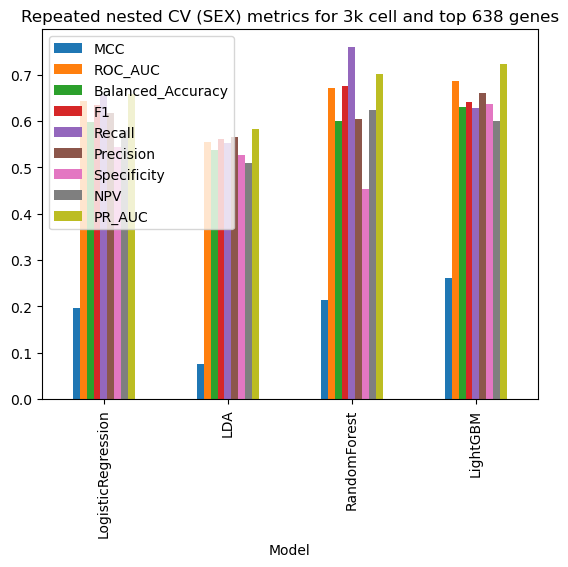

In [54]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_SEX_summary_results_HY.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_SEX_summary_results_HY.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_SEX_summary_results_HY.csv")


winner=get_winner(summary=results_df)

print(f"The winner method for HY only is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

results_df.plot(x='Model',kind='bar',stacked=False,title=f'Repeated nested CV (SEX) metrics for 3k cell and top {len(common_columns)} genes')

[I 2025-06-25 15:26:27,100] A new study created in memory with name: Winner:LightGBM
[I 2025-06-25 15:27:40,971] Trial 0 finished with value: 0.6211393361199393 and parameters: {'n_estimators': 760, 'max_depth': 20, 'learning_rate': 0.0075195509922613285, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6211393361199393.
[I 2025-06-25 15:28:25,193] Trial 1 finished with value: 0.6170605384531737 and parameters: {'n_estimators': 525, 'max_depth': 16, 'learning_rate': 0.35177489348446617, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6211393361199393.
[I 2025-06-25 15:29:39,916] Trial 2 finished with value: 0.6241166551317192 and parameters: {'n_estimators': 916, 'max_depth': 11, 'learning_rate': 0.011305559268355922, 'verbosity': -1, 'is_unbalance': True}. Best is trial 2 with value: 0.6241166551317192.
[I 2025-06-25 15:30:39,508] Trial 3 finished with value: 0.6235533556428019 and parameters: {'n_estimators': 736, 'max_depth': 26, 'learning_

For model LightGBM the best parameters are {'n_estimators': 840, 'max_depth': 30, 'learning_rate': 0.019263411090821667, 'verbosity': -1, 'is_unbalance': True}
Bootstrapped 95% CIs (Model trained on dev, tested on val):
Balanced Accuracy: [0.5033, 0.5380]
F1 Score       : [0.6737, 0.7058]
Precision      : [0.6555, 0.6959]
Recall         : [0.6851, 0.7249]
MCC            : [0.0068, 0.0778]
ROC AUC        : [0.5029, 0.5480]
PR AUC         : [0.6516, 0.6996]
Specificity         : 0.3356
NPV                 : 0.3672


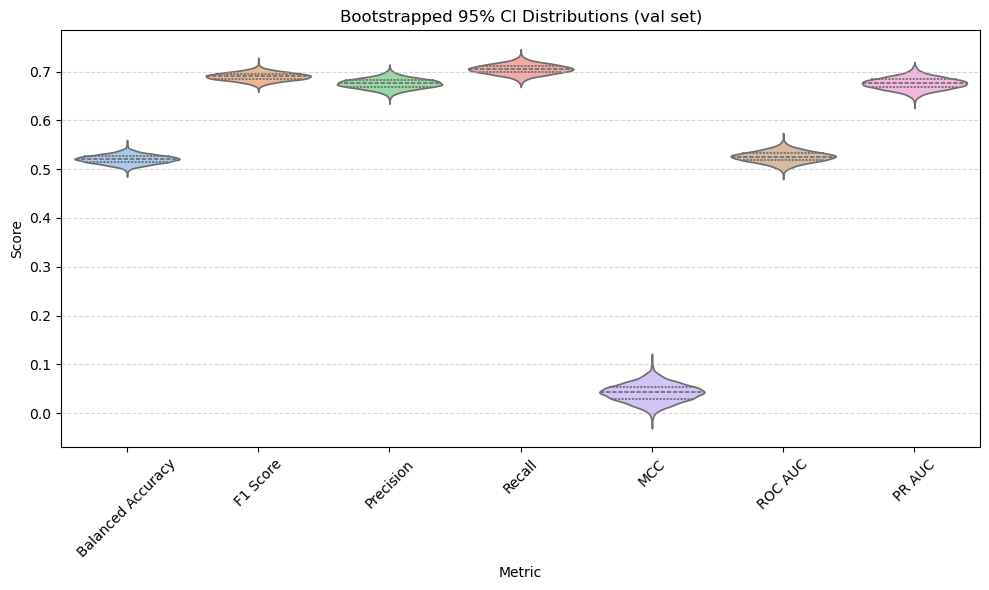

In [55]:
tuned_winner_dev=winner_tuning(df=X_df,winner=winner[0])
bootstrap_model(df_dev=X_df,df_val=test_df,model=tuned_winner_dev)

In [56]:
save_winner(train_path='../data/train_SEX_HY_subset10k.csv',
            test_path='../data/test_SEX_HY_subset3k_v2.csv',
            winner=tuned_winner_dev,
            winner_name=winner[0],
            saved_name='SEX_HY_winner')

(10000, 638)
(3000, 638)
Saving winner model (LightGBM) with name SEX_HY_winner.pkl


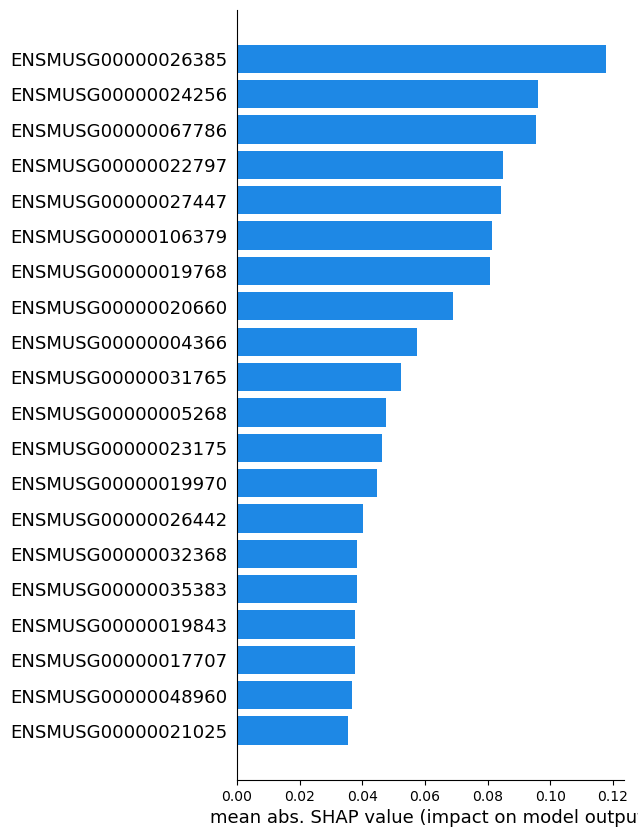

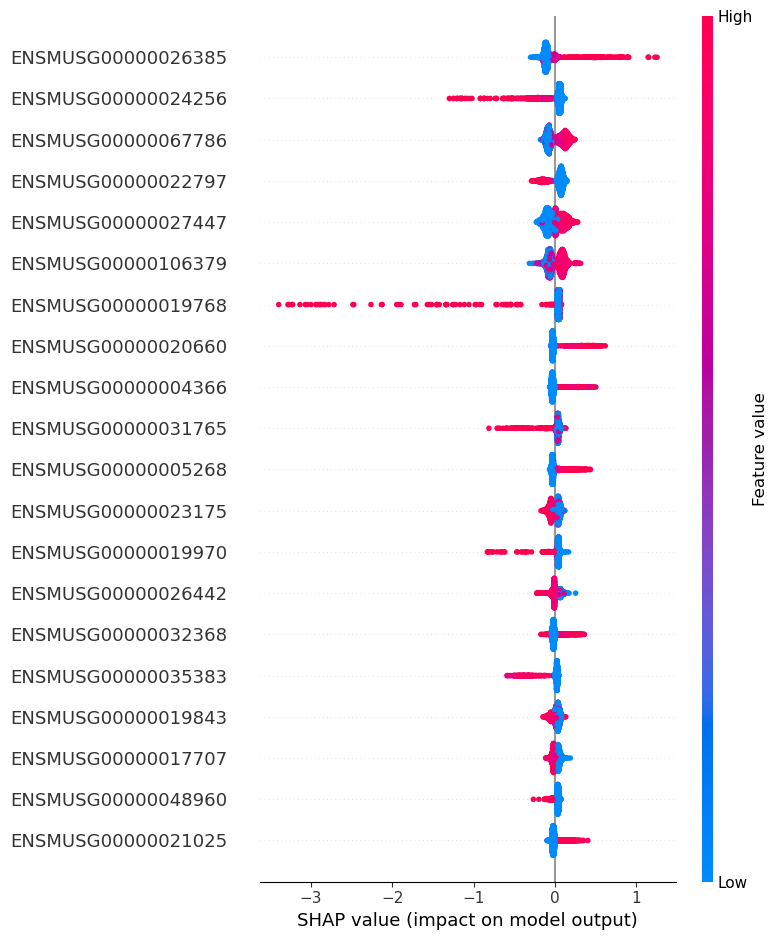

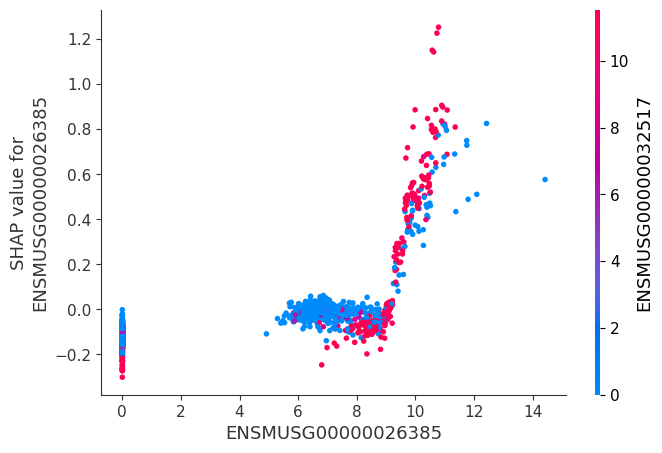

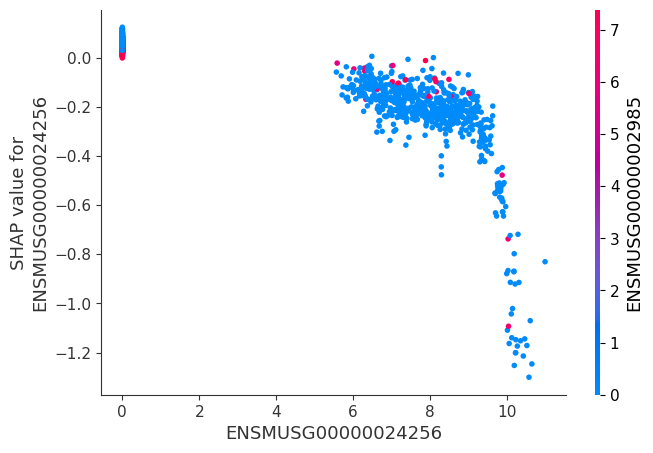

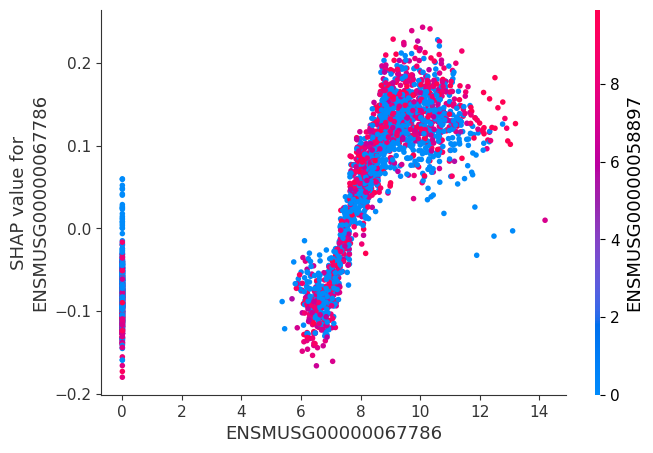

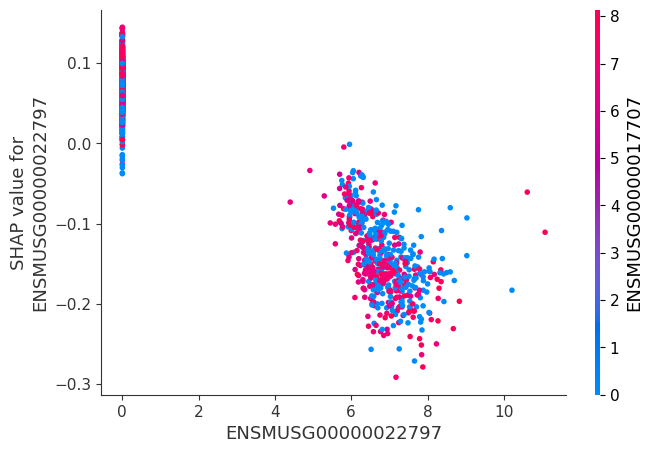

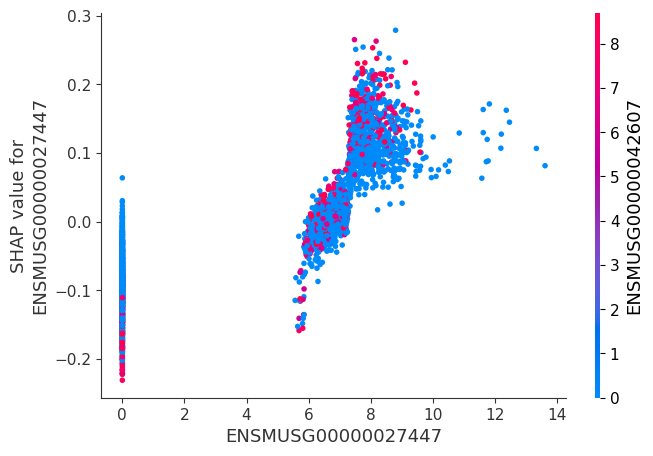

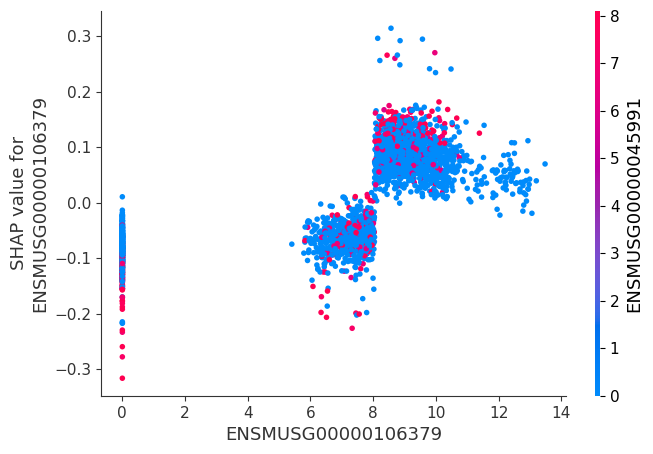

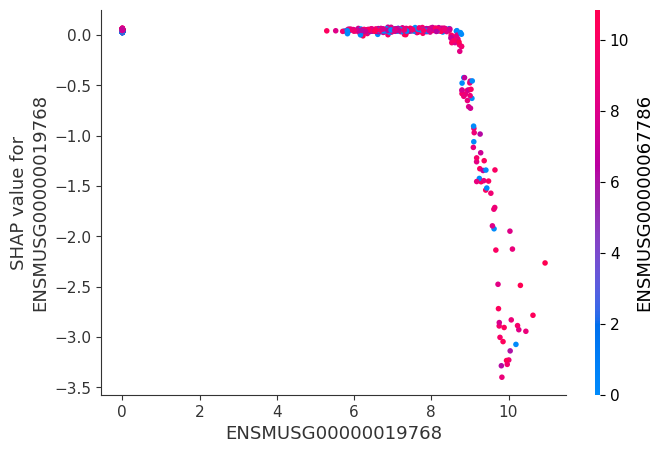

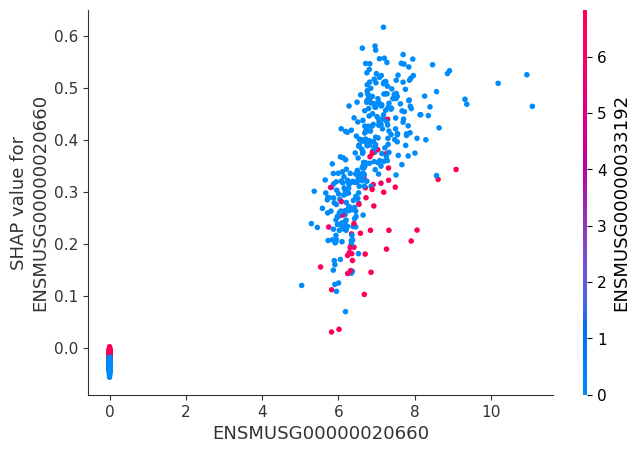

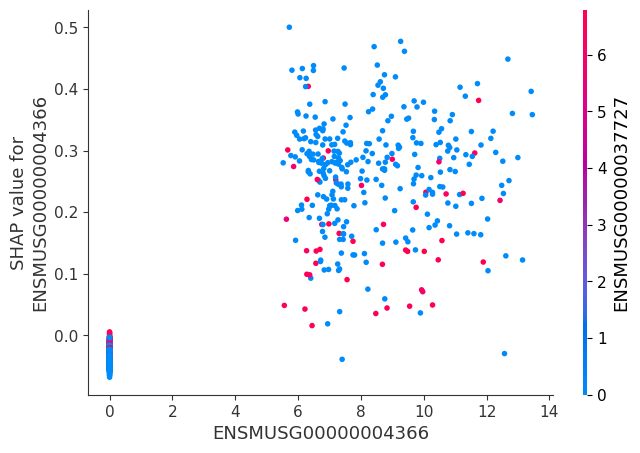

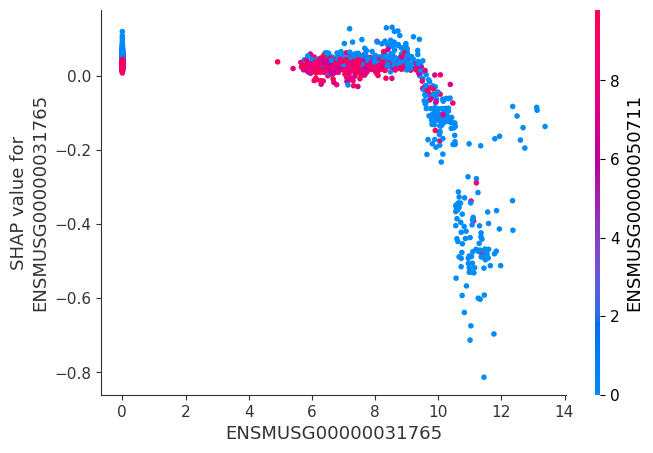

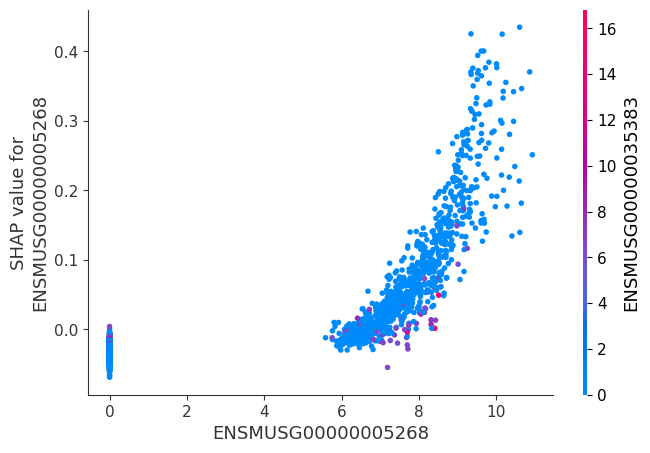

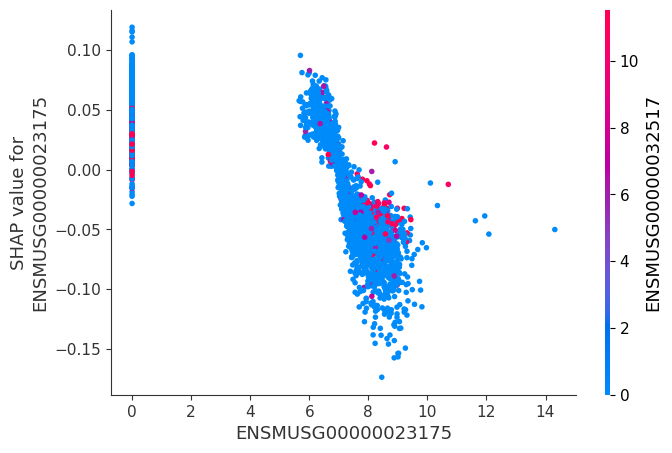

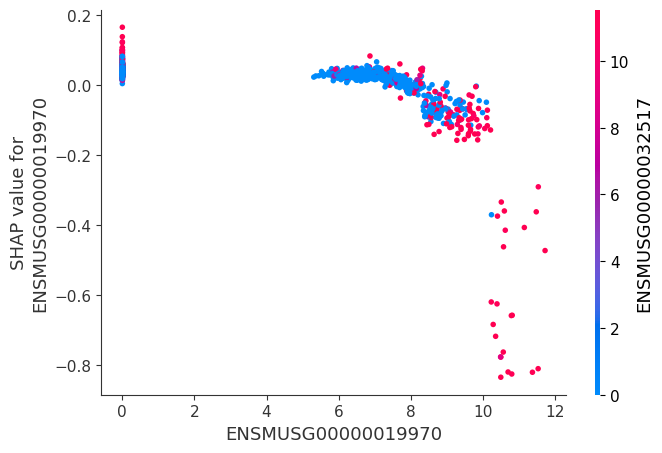

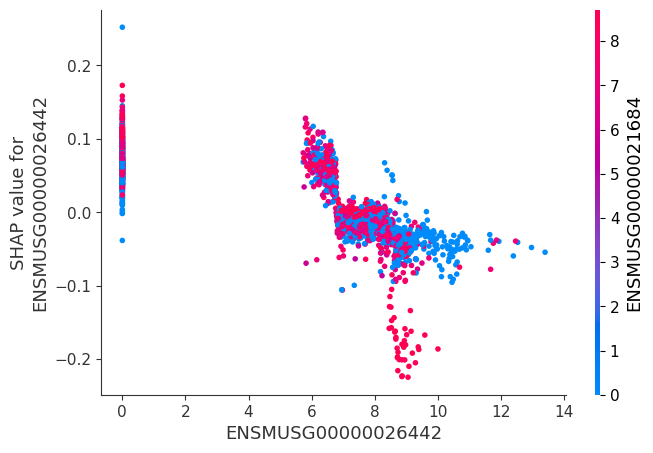

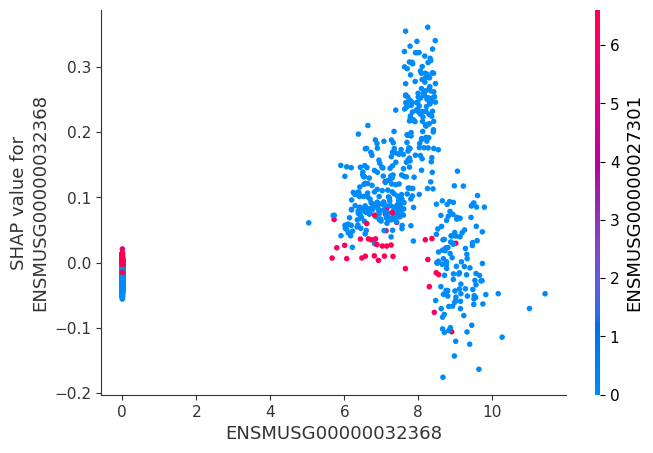

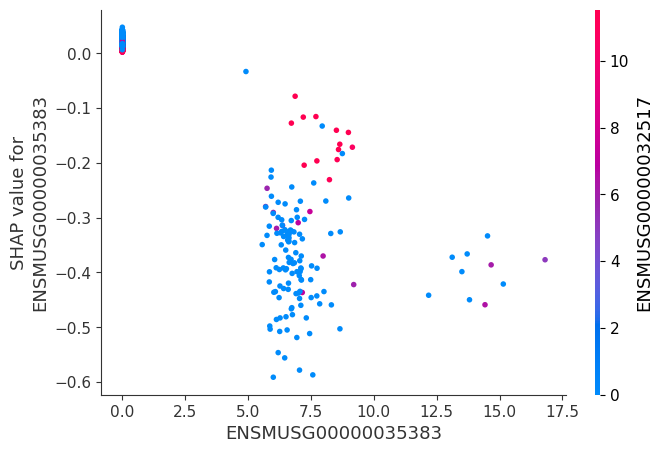

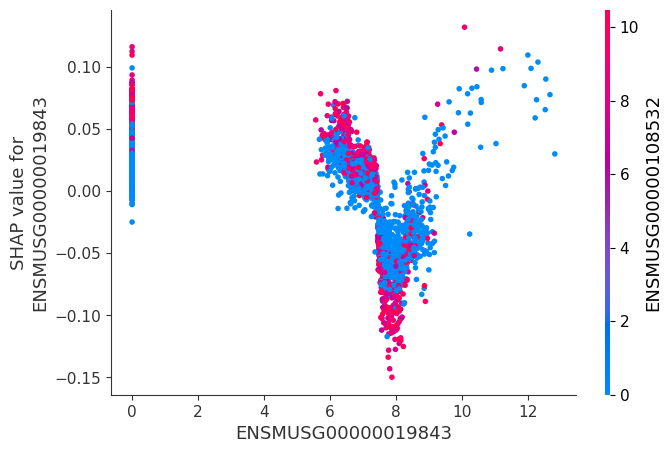

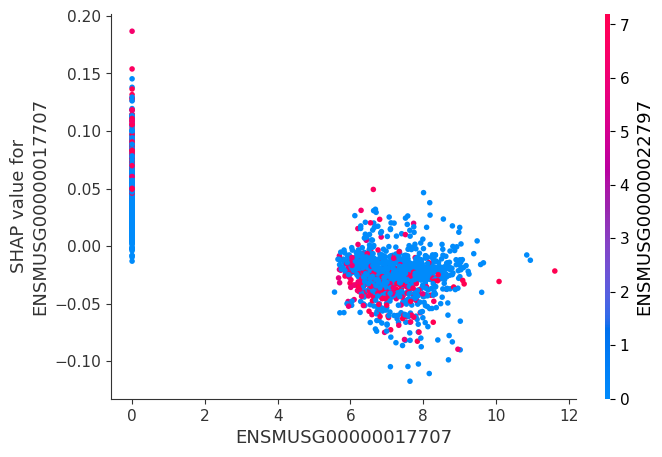

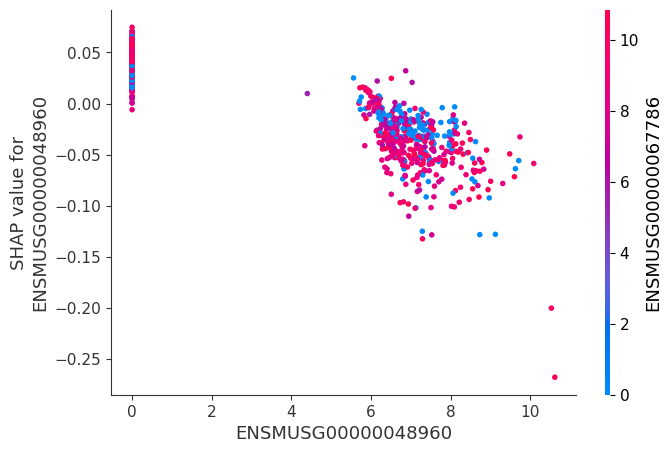

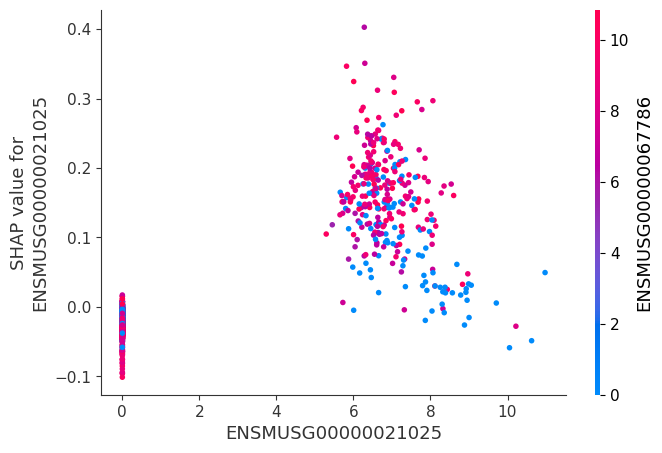

In [ ]:
explain_winner(winner_src="../models",
               dev_df=X_df,
               val_df=test_df,
               samples_explained=test_df.shape[0],
               top_k=20,
               saved_name='SEX_HY_winner')


Using SHAP we interpret the contributions of individual genes to the LBGM model's predictions. We rank the top 20 genes by their mean absolute SHAP value. We would like to note here that the SHAP values are considerably lower than before, indicating that even among those top 20 genes, no gene has such a considerable contribution to determining the sex of the cell 

For our second plot: 
- SHAP > 0 -> male
- SHAP < 0 -> female



We then use the Ensembl id's to get the corresponding gene's and infer biological meanings.

In [62]:
ensembl_ids = [
    "ENSMUSG00000026385",
    "ENSMUSG00000024256",
    "ENSMUSG00000067786",
    "ENSMUSG00000022797",
    "ENSMUSG00000027447",
    "ENSMUSG00000106379",
    "ENSMUSG00000019768",
    "ENSMUSG00000020660",
    "ENSMUSG00000004366",
    "ENSMUSG00000031765",
    "ENSMUSG00000005268",
    "ENSMUSG00000023175",
    "ENSMUSG00000019970",
    "ENSMUSG00000026442",
    "ENSMUSG00000032368",
    "ENSMUSG00000035383",
    "ENSMUSG00000019843",
    "ENSMUSG00000017707",
    "ENSMUSG00000048960",
    "ENSMUSG00000021025"
]

In [ ]:
from mygene import MyGeneInfo
import pandas as pd


def annotate_genes_with_go_and_pathways(ensembl_ids):

    mg = MyGeneInfo()

    results = []

    def extract_go_and_pathways(gene_data):
        go_terms = []
        pathways = []

        go = gene_data.get("go", {})
        for cat in ["BP", "MF", "CC"]:
            entries = go.get(cat, [])
            # Ensure entries is always a list
            if isinstance(entries, dict):
                entries = [entries]
            elif not isinstance(entries, list):
                continue  # skip invalid formats

            for entry in entries:
                go_terms.append(f"{cat}: {entry.get('term')} ({entry.get('id')})")

        pwy = gene_data.get("pathway", {})
        if isinstance(pwy, dict):
            for db, content in pwy.items():
                if isinstance(content, list):
                    for entry in content:
                        pathways.append(f"{db.upper()}: {entry.get('name')} ({entry.get('id')})")
                elif isinstance(content, dict):
                    pathways.append(f"{db.upper()}: {content.get('name')} ({content.get('id')})")

        return "; ".join(go_terms), "; ".join(pathways)


    # Query one-by-one
    for gene in ensembl_ids:
        try:
            data = mg.getgene(gene, fields="symbol,name,go,pathway", species="mouse")
            go_str, pwy_str = extract_go_and_pathways(data)
            results.append({
                "Ensembl_ID": gene,
                "Symbol": data.get("symbol", ""),
                "Gene_Name": data.get("name", ""),
                "GO_Terms": go_str,
                "Pathways": pwy_str
            })
        except Exception as e:
            print(f"Error retrieving {gene}: {e}")
            results.append({
                "Ensembl_ID": gene,
                "Symbol": "",
                "Gene_Name": "",
                "GO_Terms": "",
                "Pathways": ""
            })

    return pd.DataFrame(results)

In [79]:
annotations_df = annotate_genes_with_go_and_pathways(ensembl_ids)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

In [80]:
annotations_df

,Ensembl_ID,Symbol,Gene_Name,GO_Terms,Pathways
0,ENSMUSG00000026385,Dbi,diazepam binding inhibitor,BP: behavioral fear response (GO:0001662); BP:...,KEGG: PPAR signaling pathway - Mus musculus (m...
1,ENSMUSG00000024256,Adcyap1,adenylate cyclase activating polypeptide 1,BP: ovarian follicle development (GO:0001541);...,KEGG: cAMP signaling pathway - Mus musculus (m...
2,ENSMUSG00000067786,Nnat,neuronatin,BP: brain development (GO:0007420); BP: respon...,
3,ENSMUSG00000022797,Tfrc,transferrin receptor,BP: response to hypoxia (GO:0001666); BP: iron...,KEGG: HIF-1 signaling pathway - Mus musculus (...
4,ENSMUSG00000027447,Cst3,cystatin C,BP: eye development (GO:0001654); BP: response...,KEGG: Salivary secretion - Mus musculus (mouse...
5,ENSMUSG00000106379,Lhfpl3,lipoma HMGIC fusion partner-like 3,BP: sensory perception of sound (GO:0007605); ...,
6,ENSMUSG00000019768,Esr1,estrogen receptor 1 (alpha),BP: negative regulation of transcription by RN...,KEGG: Estrogen signaling pathway - Mus musculu...
7,ENSMUSG00000020660,Pomc,pro-opiomelanocortin-alpha,BP: negative regulation of inflammatory respon...,KEGG: cAMP signaling pathway - Mus musculus (m...
8,ENSMUSG00000004366,Sst,somatostatin,BP: hyperosmotic response (GO:0006972); BP: re...,KEGG: cAMP signaling pathway - Mus musculus (m...
9,ENSMUSG00000031765,Mt1,metallothionein 1,BP: intracellular zinc ion homeostasis (GO:000...,KEGG: Mineral absorption - Mus musculus (mouse...


In [81]:
from collections import Counter

all_go_terms = []
for terms in annotations_df['GO_Terms']:
    if pd.notna(terms):
        all_go_terms.extend(term.strip() for term in terms.split(";"))

go_counts = Counter(all_go_terms)

#GO terms shared by 2 or more genes
shared_go = {term: count for term, count in go_counts.items() if count > 1}

all_pathways = []
for p in annotations_df['Pathways']:
    if pd.notna(p):
        all_pathways.extend(p.strip() for p in p.split(";"))

pathway_counts = Counter(all_pathways)
shared_pathways = {p: count for p, count in pathway_counts.items() if count > 1}

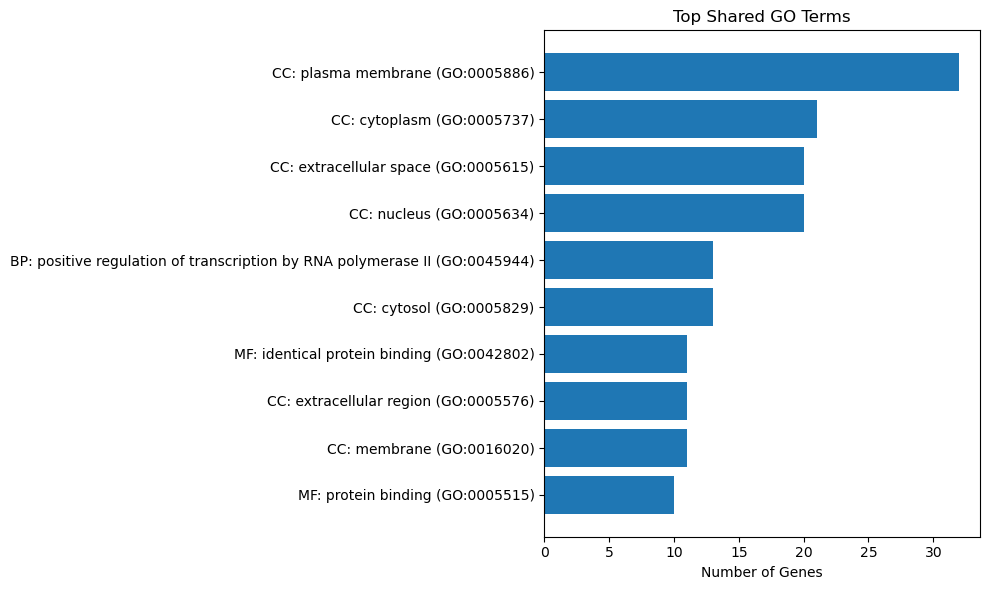

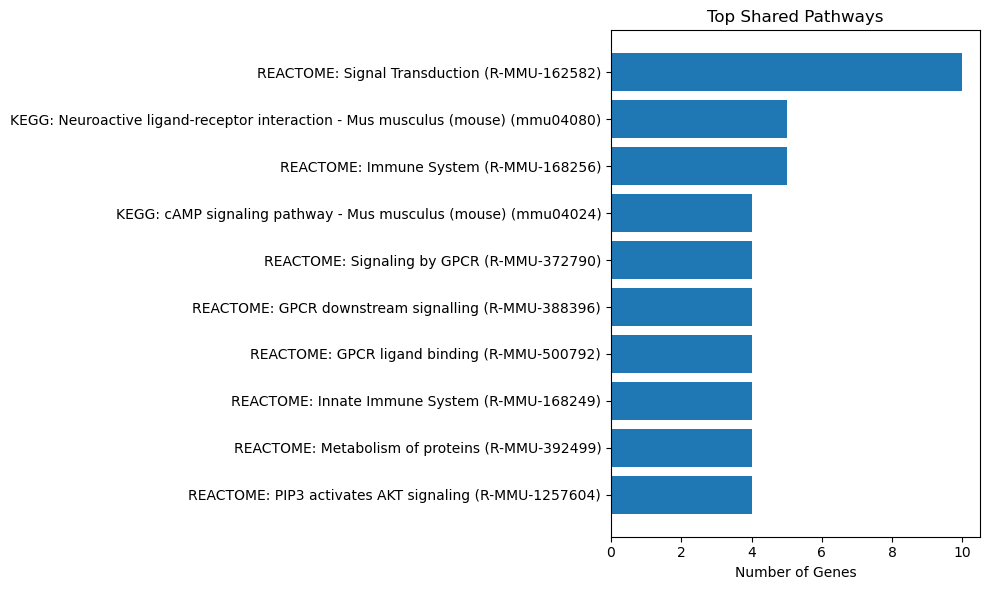

In [82]:
import matplotlib.pyplot as plt

def plot_shared_terms(term_dict, title, top_n=10):
    top_terms = dict(sorted(term_dict.items(), key=lambda x: x[1], reverse=True)[:top_n])
    plt.figure(figsize=(10, 6))
    plt.barh(list(top_terms.keys()), list(top_terms.values()))
    plt.xlabel("Number of Genes")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_shared_terms(shared_go, "Top Shared GO Terms")
plot_shared_terms(shared_pathways, "Top Shared Pathways")

Although the results obtained in this case should be interpreted with caution due to the limitations of the classifier used, some patterns are still worth noting. The shared GO terms are largely dominated by cellular component categories such as the extracellular space, plasma membrane, and cytoplasm. In terms of biological processes, we observe enrichment in functions like the positive regulation of transcription by RNA polymerase II, while molecular function terms are heavily skewed toward protein binding. Similarly, pathway analysis highlights signal transduction and GPCR signaling pathways—paralleling the trends seen in region-specific classifications. However, it is important to emphasize that these findings stem from a classifier with limited reliability, which significantly undermines the robustness and interpretability of the results.


In [83]:
from anndata import AnnData
import scanpy as sc

# Remove the label column to get expression matrix
X = test_df.drop(columns=['sex'])

# Subset to the top 20 SHAP genes using Ensembl IDs
X_top = X[ensembl_ids]

# Create AnnData object
adata = AnnData(X_top.values)
adata.var_names = ensembl_ids
adata.obs['sex'] = test_df['sex'].map({0: 'Female', 1: 'Male'}).values
adata.obs_names = test_df.index.astype(str)

In [84]:
sc.pp.scale(adata)
sc.pp.pca(adata, n_comps=10)
sc.pp.neighbors(adata, n_pcs=10)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

We will once again apply UMAP dimensionality reduction and visualization, both to illustrate the complexity of the classification task and to provide insight into why working with substantially smaller datasets often fails to yield satisfactory results. This step highlights the underlying structure and overlap between classes, reinforcing the challenges posed by limited data in capturing the full variability of the system.

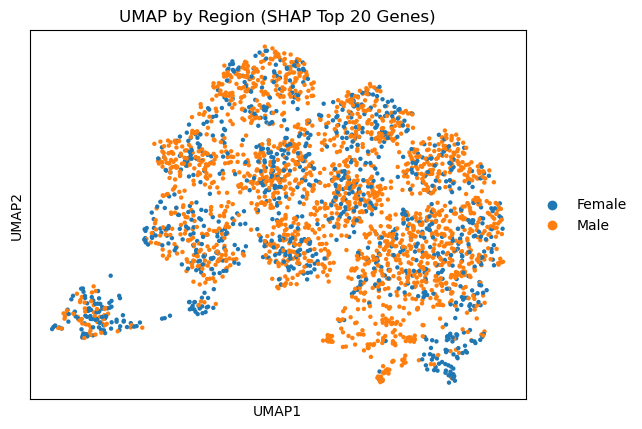

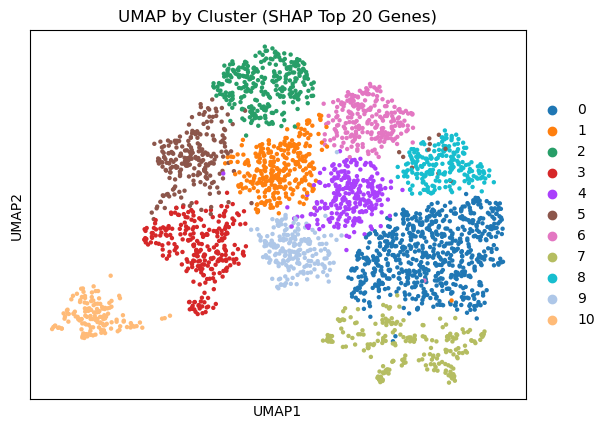

In [85]:
# UMAP colored by region (true label)
sc.pl.umap(adata, color="sex", title="UMAP by Region (SHAP Top 20 Genes)")

# UMAP colored by cluster (leiden)
sc.pl.umap(adata, color="leiden", title="UMAP by Cluster (SHAP Top 20 Genes)")